In [ ]:
#testing out the nba_api
from nba_api.stats.endpoints import playercareerstats
# Anthony Davis
career = playercareerstats.PlayerCareerStats(player_id='203076')
career.get_data_frames()[0].columns

In [2]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#file path for each csv files
adv_path = "Research Data/NBAadvanced.csv"
per_path = "Research Data/NBAper36.csv"
sal_path = "Research Data/NBAsalaries.csv"
birth_path = "Research Data/birth_dataframe.csv"
income_path = "Research Data/State_median_income.csv"

#turning all of the csv file into data
adv_data = pd.read_csv(adv_path, encoding='utf8')
per_data = pd.read_csv(per_path, encoding='utf8')
sal_data = pd.read_csv(sal_path, encoding='utf8')
birth_data = pd.read_csv(birth_path, encoding='utf8')
income_data = pd.read_csv(income_path, encoding='utf8')

#adjustment for birht_data
birth_data = birth_data[["Player","City", "State"]]

#adjustment for median household income
income_data= income_data[['Name', 'Poverty Percent, All Ages', 'Median Household Income']]
income_data= income_data.rename(columns=({'Name': 'State'}))

#filling all of the null values with 
adv_data.fillna(0, inplace = True)
per_data.fillna(0, inplace = True) 
sal_data.fillna(0, inplace = True) 

In [4]:

adv_birth = pd.merge(adv_data,birth_data, on = "Player")
per_birth = pd.merge(per_data,birth_data, on = "Player")
per_birth_sal = pd.merge(per_birth,sal_data, on = "Player")
adv_birth_sal = pd.merge(adv_birth,sal_data, on = "Player")


In [5]:
#per_birth_sal.count()
per_birth_sal.to_csv("per_birth_sal.csv", index= False)

In [6]:
adv_birth_sal.to_csv("adv_birth_sal.csv", index=False)

In [7]:
per_birth_sal['millions'] = per_birth_sal['2019-20']/1000000
state_sal = per_birth_sal.groupby('State')['millions'].median().reset_index()
play_sal = per_birth_sal.groupby('State')['Player'].count().reset_index()

In [8]:
combined_df = pd.merge(state_sal,play_sal, on = "State")

In [9]:
combined_df = combined_df.sort_values('millions',ascending = False)

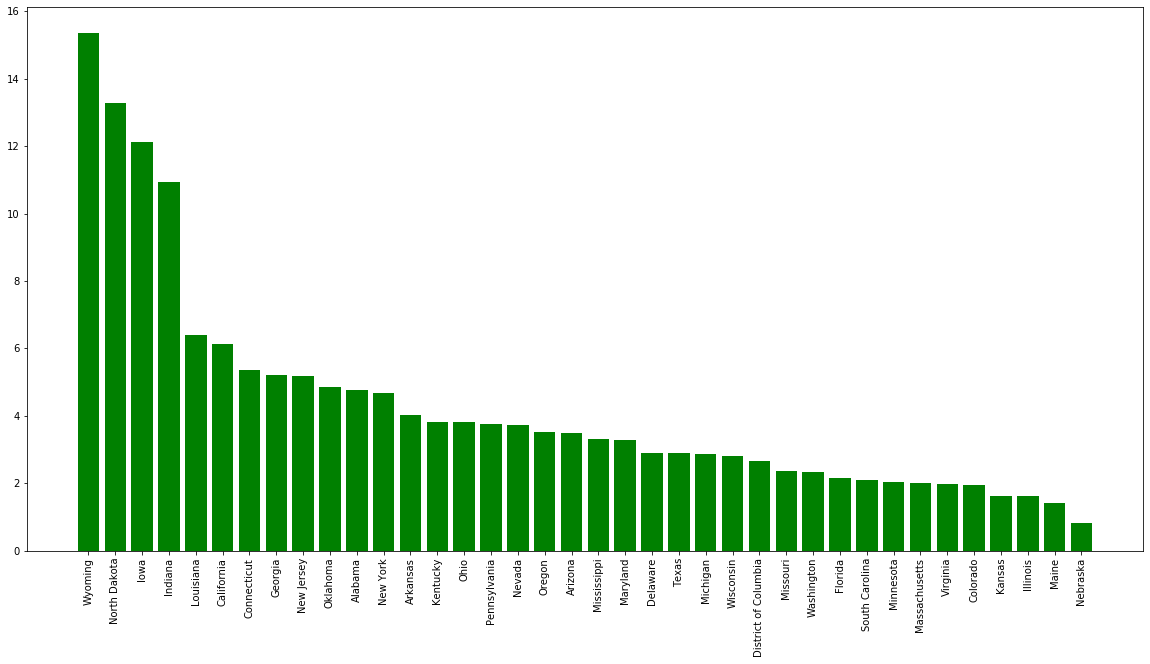

In [10]:
x_values = combined_df['State']
y_values = combined_df['millions']

plt.figure(figsize = (20,10))
plt.bar(x_values, y_values,color = 'g',align = 'center')
plt.xticks(rotation='vertical')
#plt.tight_layout()
plt.show()

In [40]:
#merge median house hold income and PER
adv_income = pd.merge(adv_birth_sal,income_data, on = "State")
adv_income = adv_income[['Player', 'Median Household Income',"State", 'PER','2019-20']]
adv_income = adv_income.rename(columns=({'2019-20': 'Salary'}))



In [67]:
adv_income_group = adv_income.groupby('State')


PER_income = pd.DataFrame({
    "Median Household Income" : adv_income_group['Median Household Income'].mean(),
    "Average PER" : adv_income_group['PER'].mean(),
    "Average Salary" : adv_income_group['Salary'].mean(),
    "Average Salary in milllions" : adv_income_group['Salary'].mean()/1000000,
    "# of Players" : adv_income_group['Median Household Income'].count()
})

PER_income.sort_values('# of Players',ascending = False, inplace = True)

In [68]:
PER_income

,Median Household Income,Average PER,Average Salary,Average Salary in milllions,# of Players
State,,,,,
California,75250.0,14.247500,1.132885e+07,11.328848,40
Texas,60632.0,12.569231,7.076579e+06,7.076579,26
Illinois,65063.0,12.924000,5.738688e+06,5.738688,25
New York,67648.0,14.144444,9.062336e+06,9.062336,18
Pennsylvania,60891.0,11.783333,6.703644e+06,6.703644,18
Florida,55433.0,9.886667,5.686554e+06,5.686554,15
Indiana,55725.0,12.614286,1.139961e+07,11.399612,14
Louisiana,48021.0,12.461538,7.747498e+06,7.747498,13
Georgia,58634.0,13.769231,6.836421e+06,6.836421,13


The correlation between both factors is -0.05


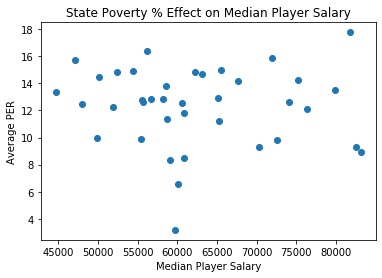

In [69]:
# Scatter plot
PER_income.loc[PER_income["# of Players"] > 10]
x_data= PER_income['Median Household Income']
y_data= PER_income['Average PER']

# x_data= PER_income.iloc[0:14,0]
# y_data= PER_income.iloc[0:14,1]
correlation = st.pearsonr(x_data,y_data)

plt.scatter(x_data,y_data)

plt.title('State Poverty % Effect on Median Player Salary')
plt.xlabel('Median Player Salary')
plt.ylabel('Average PER')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('images/Bry/scatter_plot2.pdf')
plt.show()